First, load packages and read in the data set.

In [224]:
#First, load packages and read in the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv("kc_house_data.csv")

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Time to convert the non-numeric values to strings and make sure the numeric ones are integers or floats.

In [226]:
df.lat = df.lat.astype(str)
df.long = df.long.astype(str)




In [227]:
df.zipcode.astype(int)

0        98178
1        98125
2        98028
3        98136
4        98074
5        98053
6        98003
7        98198
8        98146
9        98038
10       98007
11       98115
12       98028
13       98074
14       98107
15       98126
16       98019
17       98103
18       98002
19       98003
20       98133
21       98040
22       98092
23       98030
24       98030
25       98002
26       98119
27       98112
28       98115
29       98052
         ...  
21567    98102
21568    98116
21569    98042
21570    98107
21571    98125
21572    98117
21573    98038
21574    98074
21575    98178
21576    98103
21577    98056
21578    98042
21579    98103
21580    98059
21581    98040
21582    98001
21583    98053
21584    98004
21585    98125
21586    98010
21587    98065
21588    98144
21589    98056
21590    98136
21591    98116
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [228]:
df.zipcode = df.zipcode.astype(str)

Now it's time to clean the data. This involves looking at each column, getting rid of obvious outliers as well as null values. The process for getting rid of null values is dependent on each variable. 

Bedrooms is first - check the values:

In [229]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [230]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [231]:
df.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [232]:
df.sqft_living.mean()

2080.3218502569803

In [233]:
df.sqft_lot.unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076])

In [234]:
df.sqft_lot.mean()

15099.408760475992

In [235]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [236]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [237]:
df.yr_renovated = df.yr_renovated.fillna(df.yr_renovated.mean()) 

In [238]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [239]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [240]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [241]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [242]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [243]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [244]:
df.waterfront = df.waterfront.fillna(0.0)

In [245]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [246]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [247]:
df.waterfront = df.waterfront.astype(float)

In [248]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(10), object(5)
memory usage: 3.5+ MB


In [250]:
df.sqft_basement = df.sqft_basement.replace('?', 0)

In [251]:
df.sqft_basement = df.sqft_basement.astype(float)

In [252]:
df.sqft_basement.mean()

285.7165810066213

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(4)
memory usage: 3.5+ MB


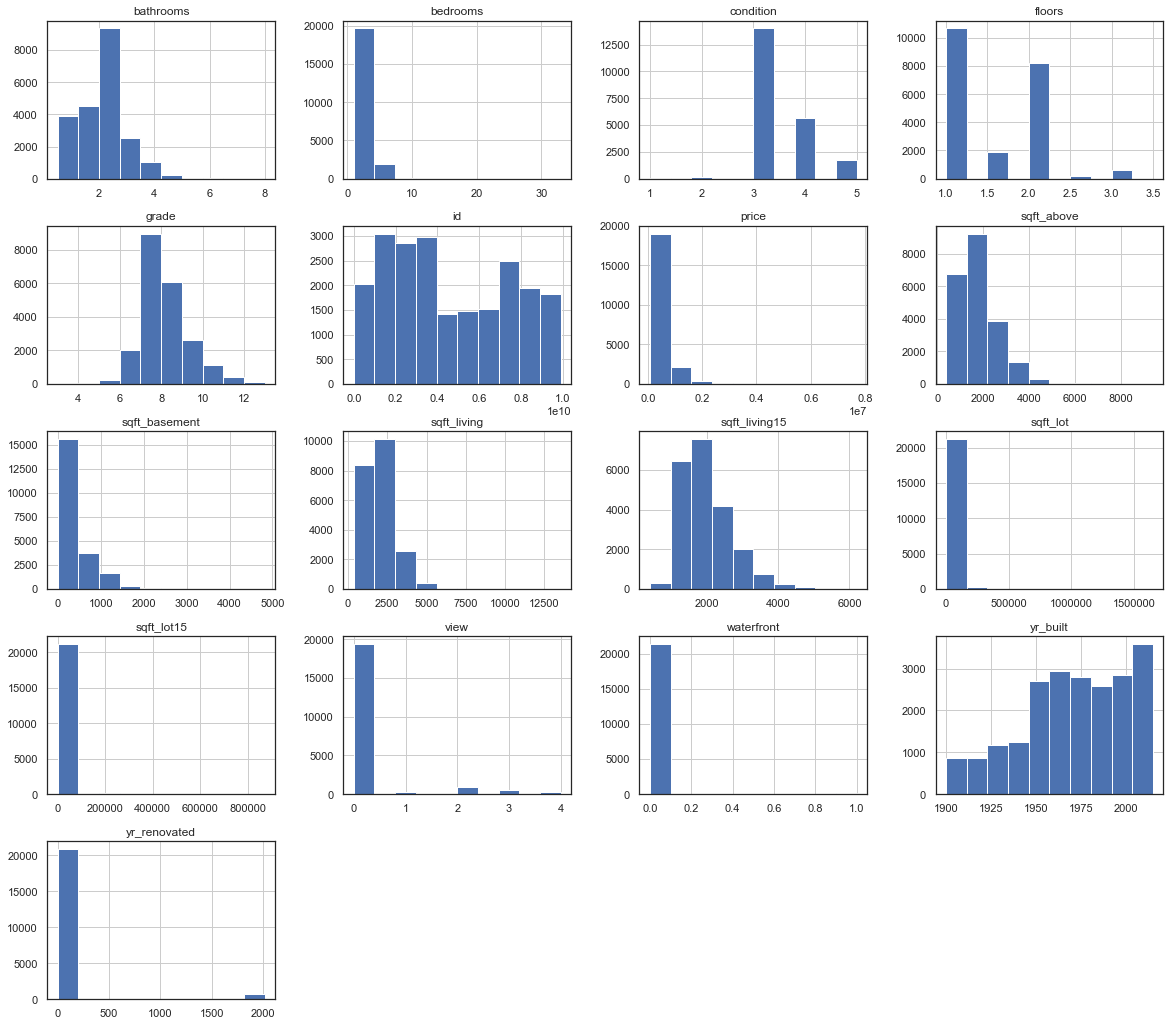

In [254]:
df.hist(figsize = (20,18));

In [255]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [256]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [257]:
df = df[df.bedrooms != 33]

In [258]:
df = df[df.bedrooms != 11]

In [259]:
df = df[df.bedrooms != 10]

In [260]:
df = df[df.bedrooms != 9]

In [261]:
df = df[df.bedrooms != 8]

In [262]:
df.bedrooms.unique()

array([3, 2, 4, 5, 1, 6, 7])

In [263]:
df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
7      38
Name: bedrooms, dtype: int64

In [264]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.75, 6.25, 6.5 ])

In [265]:
df = df[df.bathrooms != 8]

In [266]:
df = df[df.bathrooms != 7.75]

In [267]:
df = df[df.bathrooms != 7.5]

In [268]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 6.25, 6.5 ])

In [269]:
 df.sqft_lot = np.log(df.sqft_lot)

In [270]:
df.sqft_living = np.log(df.sqft_living)

In [271]:
df.sqft_living15 = np.log(df.sqft_living15)

In [272]:
df.sqft_lot = np.log(df.sqft_lot)

In [273]:
df.sqft_above = np.log(df.sqft_above)

In [274]:
df.sqft_living15 = np.log(df.sqft_living)

In [275]:
df.sqft_lot15 = np.log(df.sqft_lot15)

In [276]:
#df.sqft_basement = np.log(df.sqft_basement)

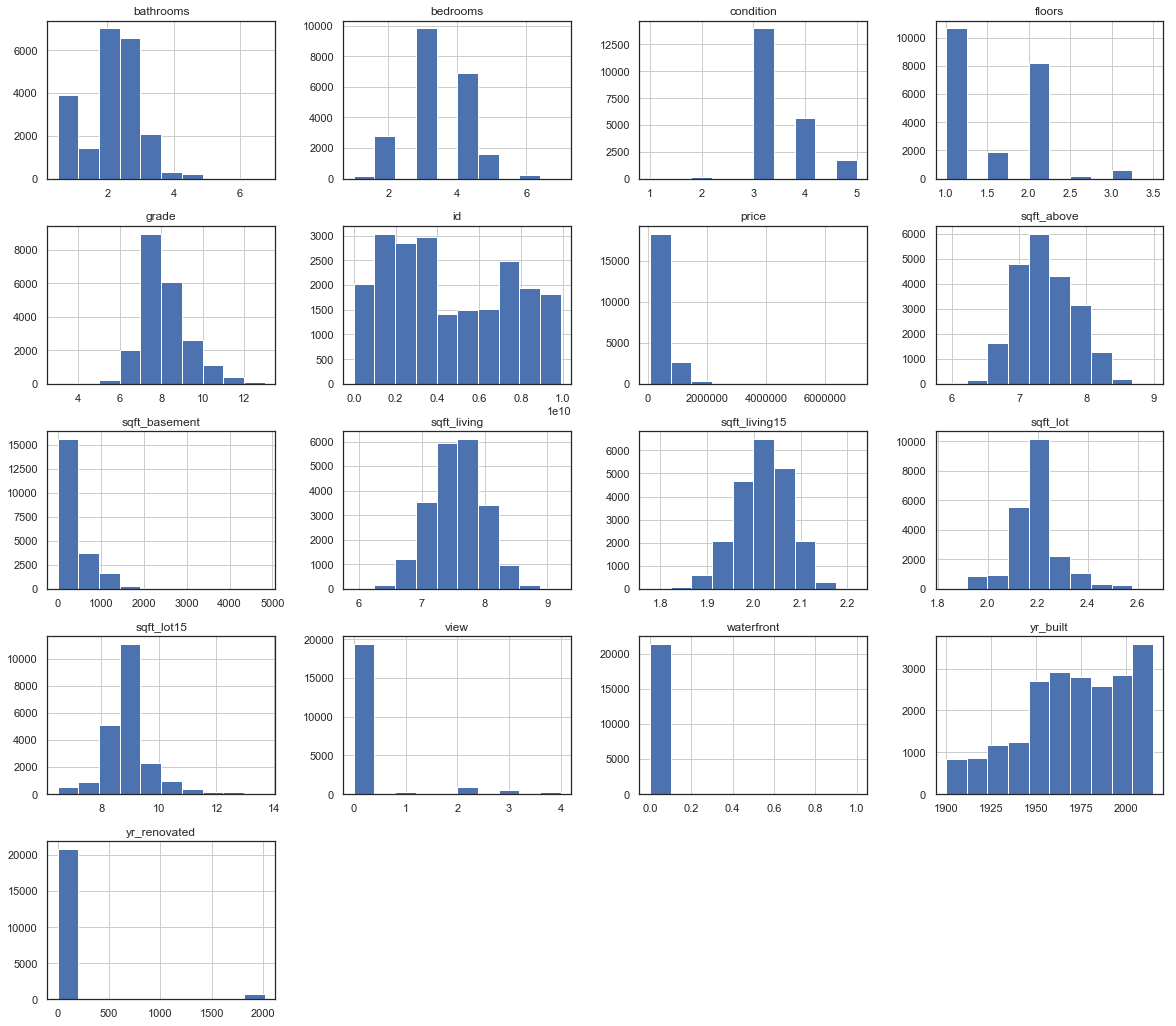

In [277]:
df.hist(figsize = (20,18));

In [278]:
#What happened to the Waterfront variable?

In [279]:
#df.waterfront.unique()
#df.waterfront = df.waterfront.astype(str)
#df.waterfront.unique()

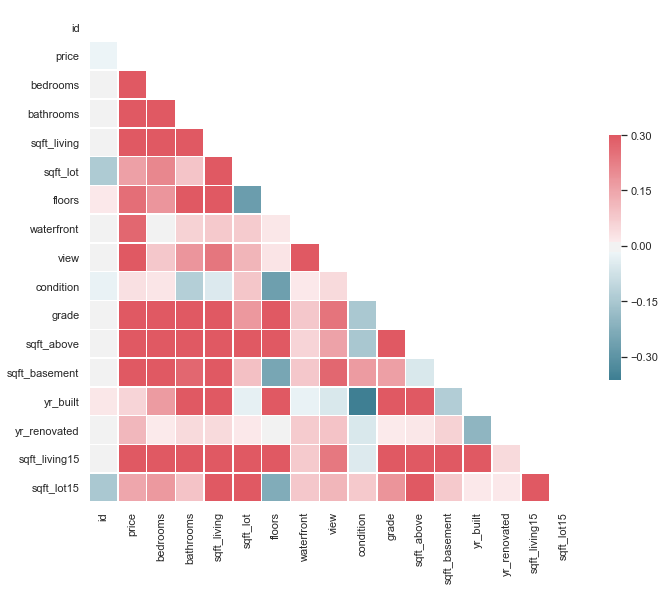

In [280]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
#Ok so it looks like there is some serious mulitcolinerarty going on - square feet is
#heavily correlated with bed/bathroom space. 

In [126]:
kingCounty_features = pd.DataFrame(df)
kingCounty_features = kingCounty_features.drop(["bedrooms","bathrooms", "sqft_above", "grade"],axis=1)

In [127]:
kingCounty_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21570 entries, 0 to 21596
Data columns (total 17 columns):
id               21570 non-null int64
date             21570 non-null object
price            21570 non-null float64
sqft_living      21570 non-null float64
sqft_lot         21570 non-null float64
floors           21570 non-null float64
waterfront       21570 non-null object
view             21507 non-null float64
condition        21570 non-null int64
sqft_basement    21570 non-null float64
yr_built         21570 non-null int64
yr_renovated     21570 non-null float64
zipcode          21570 non-null object
lat              21570 non-null object
long             21570 non-null object
sqft_living15    21570 non-null float64
sqft_lot15       21570 non-null float64
dtypes: float64(9), int64(3), object(5)
memory usage: 3.0+ MB


In [128]:
kingCounty_features.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,7.073270,2.156334,1.0,0.0,0.0,3,0.0,1955,0.000000,98178,47.5112,-122.257,1.956323,8.639411
1,6414100192,12/9/2014,538000.0,7.851661,2.184663,2.0,0.0,0.0,3,400.0,1951,1991.000000,98125,47.721000000000004,-122.319,2.060725,8.941022
2,5631500400,2/25/2015,180000.0,6.646391,2.220327,1.0,0.0,0.0,3,0.0,1933,83.636778,98028,47.7379,-122.23299999999999,1.894074,8.994917
3,2487200875,12/9/2014,604000.0,7.580700,2.142087,1.0,0.0,0.0,5,910.0,1965,0.000000,98136,47.5208,-122.39299999999999,2.025606,8.517193
4,1954400510,2/18/2015,510000.0,7.426549,2.196908,1.0,0.0,0.0,3,0.0,1987,0.000000,98074,47.6168,-122.045,2.005061,8.923058


In [129]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,7.073270,2.156334,1.0,0.0,0.0,...,7,7.073270,0.0,1955,0.000000,98178,47.5112,-122.257,1.956323,8.639411
1,6414100192,12/9/2014,538000.0,3,2.25,7.851661,2.184663,2.0,0.0,0.0,...,7,7.682482,400.0,1951,1991.000000,98125,47.721000000000004,-122.319,2.060725,8.941022
2,5631500400,2/25/2015,180000.0,2,1.00,6.646391,2.220327,1.0,0.0,0.0,...,6,6.646391,0.0,1933,83.636778,98028,47.7379,-122.23299999999999,1.894074,8.994917
3,2487200875,12/9/2014,604000.0,4,3.00,7.580700,2.142087,1.0,0.0,0.0,...,7,6.956545,910.0,1965,0.000000,98136,47.5208,-122.39299999999999,2.025606,8.517193
4,1954400510,2/18/2015,510000.0,3,2.00,7.426549,2.196908,1.0,0.0,0.0,...,8,7.426549,0.0,1987,0.000000,98074,47.6168,-122.045,2.005061,8.923058


Time to run the regression using statsmodel so we can get P-Values

In [131]:
X = kingCounty_features
y = pd.DataFrame(columns= ["price"])

In [163]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [218]:
#data_fin = pd.DataFrame([])
#data_fin["sqft_living"]= df.sqft_living
#data_fin["view"] = df.view


yr_dummies = pd.get_dummies(df["yr_built"], prefix="yr")
#View shouldn't be a dummy variable
#View_dummies = pd.get_dummies(df["view"], prefix="view")
waterfront_dummies = pd.get_dummies(df["waterfront"], prefix= "waterfront")
price = df["price"]
data_fin = pd.concat([price, df.sqft_living, df.view, df.grade, waterfront_dummies], axis=1)





In [219]:
data_fin.head()

,price,sqft_living,view,grade,waterfront_0.0,waterfront_1.0
0,221900.0,7.073270,0.0,7,1,0
1,538000.0,7.851661,0.0,7,1,0
2,180000.0,6.646391,0.0,6,1,0
3,604000.0,7.580700,0.0,7,1,0
4,510000.0,7.426549,0.0,8,1,0


In [220]:
formula = "price ~ sqft_living+waterfront_dummies+view+grade"
model = ols(formula= formula, data = data_fin).fit()

In [221]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [222]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     6512.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:25:15   Log-Likelihood:            -2.9709e+05
No. Observations:               21507   AIC:                         5.942e+05
Df Residuals:                   21502   BIC:                         5.942e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.126e+06   2.38e+04    -47.275      0.000   -1.17e+06   -1.08e+06
sqft_living            1.949e+05   5837.963     33.380      0.000    1.83e+05    2.06e+05
waterfront_dummies[0] -8.786e+05   1.36e+04    -64.732      0.000   -9.05e+05   -8.52e+05
waterfront_dummies[1] -2.471e+05   1.84e+04    -13.465      0.000   -2.83e+05   -2.11e+05
view                   8.158e+04   2408.487     33.874      0.000    7.69e+04    8.63e+04
grade                   1.37e+05   2112.348     64.842      0.000    1.33e+05    1.41e+05
==============================================================================
Omnibus:                    15554.174   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           742069.234
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      31.158   Cond. No.                     6.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""